In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure

In [2]:
plt.style.use('seaborn-whitegrid')

/var/folders/76/rk_gc42d6bg4_48cwf8w9mfc0000gn/T/ipykernel_70691/2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
path = 'results_csv/td3/'
files = os.listdir(path)
print(files)

['avg_episode_length.csv', 'avg_reward_per_ep.csv', '.DS_Store', 'winrate.csv', 'won_games_lost_games.csv', 'lost_games.csv', 'avg_touched_pucks.csv', 'lossrate.csv', 'drawrate.csv', 'won_games.csv', 'lr.csv']


In [255]:
avg_episode_length = pd.read_csv(path + 'avg_episode_length.csv')
avg_reward_per_ep = pd.read_csv(path + 'avg_reward_per_ep.csv')
winrate = pd.read_csv(path + 'winrate.csv')
won_games_lost_games = pd.read_csv(path + 'won_games_lost_games.csv')
lost_games = pd.read_csv(path + 'lost_games.csv')
avg_touched_pucks = pd.read_csv(path + 'avg_touched_pucks.csv')
lossrate = pd.read_csv(path + 'lossrate.csv')
drawrate = pd.read_csv(path + 'drawrate.csv')
won_games = pd.read_csv(path + 'won_games.csv')
lr = pd.read_csv(path + 'lr.csv')
lr_scheduler_wr = pd.read_csv(path + 'lr_scheduler_wr.csv')
lr_scheduler_lr = pd.read_csv(path + 'lr_scheduler_lr.csv')
lr_scheduler_dr = pd.read_csv(path + 'lr_scheduler_dr.csv')

In [256]:
# delete all columns that contain 'MIN' or 'MAX' in the name
avg_episode_length = avg_episode_length.loc[:, ~avg_episode_length.columns.str.contains('MIN|MAX')]
avg_reward_per_ep = avg_reward_per_ep.loc[:, ~avg_reward_per_ep.columns.str.contains('MIN|MAX')]
winrate = winrate.loc[:, ~winrate.columns.str.contains('MIN|MAX')]
won_games_lost_games = won_games_lost_games.loc[:, ~won_games_lost_games.columns.str.contains('MIN|MAX')]
lost_games = lost_games.loc[:, ~lost_games.columns.str.contains('MIN|MAX')]
avg_touched_pucks = avg_touched_pucks.loc[:, ~avg_touched_pucks.columns.str.contains('MIN|MAX')]
lossrate = lossrate.loc[:, ~lossrate.columns.str.contains('MIN|MAX')]
drawrate = drawrate.loc[:, ~drawrate.columns.str.contains('MIN|MAX')]
won_games = won_games.loc[:, ~won_games.columns.str.contains('MIN|MAX')]
lrs = lr.loc[:, ~lr.columns.str.contains('MIN|MAX')]
lr_sched_wr = lr_scheduler_wr.loc[:, ~lr_scheduler_wr.columns.str.contains('MIN|MAX')]
lr_sched_lr = lr_scheduler_lr.loc[:, ~lr_scheduler_lr.columns.str.contains('MIN|MAX')]
lr_sched_dr = lr_scheduler_dr.loc[:, ~lr_scheduler_dr.columns.str.contains('MIN|MAX')]

# Hockey Environment

In [432]:
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{round(value*1e-6, 2)}M'
    elif value >= 1e3:
        return f'{int(value*1e-3)}K'
    else:
        return f'{value}'

### Defending -> Shooting training - Appendix

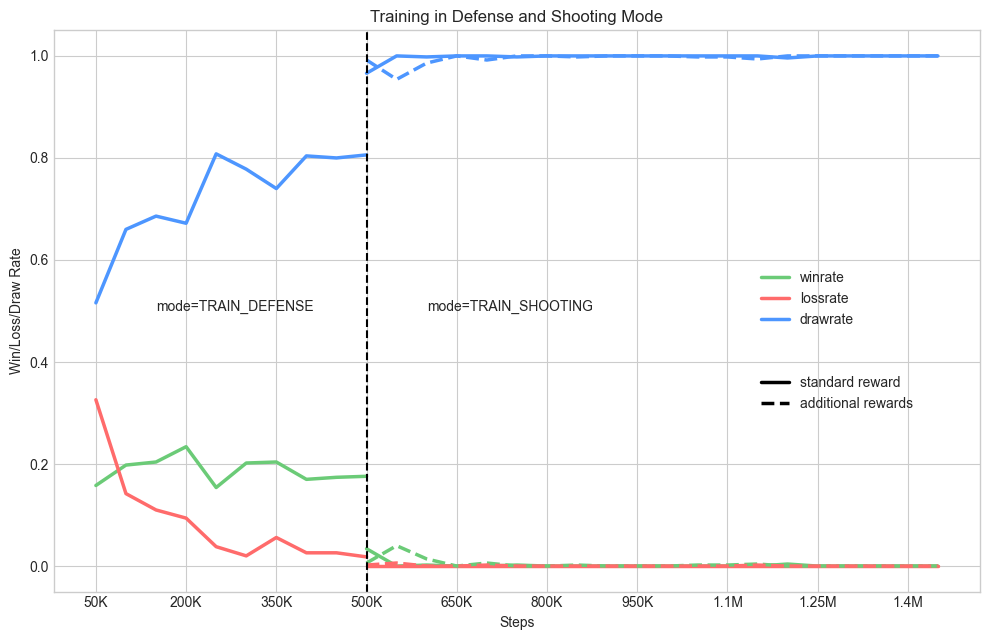

In [477]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6.5))

# Train in defens mode
wr_train_defense = winrate['TD3 defense - winrate'][~np.isnan(winrate['TD3 defense - winrate'])]
lr_train_defense = lossrate['TD3 defense - lossrate'][~np.isnan(lossrate['TD3 defense - lossrate'])]
dr_train_defense = drawrate['TD3 defense - drawrate'][~np.isnan(drawrate['TD3 defense - drawrate'])]

# train in shooting mode after pretrained in defense mode with standard rewards
wr_train_shooting_standard = winrate['TD3 pretrained def -> shooting - winrate'][~np.isnan(winrate['TD3 pretrained def -> shooting - winrate'])]
lr_train_shooting_standard = lossrate['TD3 pretrained def -> shooting - lossrate'][~np.isnan(lossrate['TD3 pretrained def -> shooting - lossrate'])]
dr_train_shooting_standard = drawrate['TD3 pretrained def -> shooting - drawrate'][~np.isnan(drawrate['TD3 pretrained def -> shooting - drawrate'])]

# train in shooting mode after pretrained in defense mode with additional rewards
wr_train_shooting_additional = winrate['TD3 retrained def ->shooting 4 rewards - winrate'][~np.isnan(winrate['TD3 retrained def ->shooting 4 rewards - winrate'])]
lr_train_shooting_additional = lossrate['TD3 retrained def ->shooting 4 rewards - lossrate'][~np.isnan(lossrate['TD3 retrained def ->shooting 4 rewards - lossrate'])]
dr_train_shooting_additional = drawrate['TD3 retrained def ->shooting 4 rewards - drawrate'][~np.isnan(drawrate['TD3 retrained def ->shooting 4 rewards - drawrate'])]

# plot the defense mode
x = np.arange(1, len(wr_train_defense)+1, 1) * 50_000  # evaluated at every 50k steps
plt.plot(x, wr_train_defense, label='winrate', c='#6BCB77', linewidth=2.5, linestyle='solid')
plt.plot(x, lr_train_defense, label='lossrate', c='#FF6B6B', linewidth=2.5, linestyle='solid')
plt.plot(x, dr_train_defense, label='drawrate', c='#4D96FF', linewidth=2.5, linestyle='solid')

# plot the shooting mode with stadard reward
x = np.arange(len(wr_train_defense), len(wr_train_shooting)+len(wr_train_defense), 1) * 50_000  # evaluated at every 50k steps
plt.plot(x, wr_train_shooting_standard, c='#6BCB77', linewidth=2.5, linestyle='solid')
plt.plot(x, lr_train_shooting_standard, c='#FF6B6B', linewidth=2.5, linestyle='solid')
plt.plot(x, dr_train_shooting_standard, c='#4D96FF', linewidth=2.5, linestyle='solid')

# plot the shooting mode with additional reward

x = np.arange(len(wr_train_defense), len(wr_train_shooting)+len(wr_train_defense), 1) * 50_000  # evaluated at every 50k steps
plt.plot(x, wr_train_shooting_additional, c='#6BCB77', linewidth=2.5, linestyle='--')
plt.plot(x, lr_train_shooting_additional, c='#FF6B6B', linewidth=2.5, linestyle='--')
plt.plot(x, dr_train_shooting_additional, c='#4D96FF', linewidth=2.5, linestyle='--')


# vertical line to indicate the end of the defense mode
plt.axvline(x=50_000*len(wr_train_defense), color='black', linestyle='--', linewidth=1.5)
# add text to the vertical line
plt.text(150_000, 0.5, 'mode=TRAIN_DEFENSE', fontsize=10)
plt.text(600_000, 0.5, 'mode=TRAIN_SHOOTING', fontsize=10)

# format the x ticks
plt.xticks(np.arange(1, len(wr_train_defense)+len(wr_train_shooting)+1, 3) * 50_000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# add two legends
linestyle_lines = []
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle='solid')[0])
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle='--')[0])
linecolor_lines = []
linecolor_lines.append(axes.plot([],[], c="#6BCB77", linewidth=2.5, linestyle='solid')[0])
linecolor_lines.append(axes.plot([],[], c="#FF6B6B", linewidth=2.5, linestyle='solid')[0])
linecolor_lines.append(axes.plot([],[], c="#4D96FF", linewidth=2.5, linestyle='solid')[0])
legend1 = plt.legend([linecolor_lines[i] for i in [0,1,2]], ["winrate", "lossrate", "drawrate"], bbox_to_anchor=(0.75, 0.45), loc='lower left')
legend2 = plt.legend([linestyle_lines[i] for i in [0,1]], ["standard reward", "additional rewards"], bbox_to_anchor=(0.75, 0.3), loc='lower left')
axes.add_artist(legend1)

plt.xlabel('Steps')
plt.ylabel('Win/Loss/Draw Rate')
plt.title('Training in Defense and Shooting Mode')
plt.tight_layout()
plt.savefig('plots_report/td3_train_defense_shooting.pdf')
plt.show()

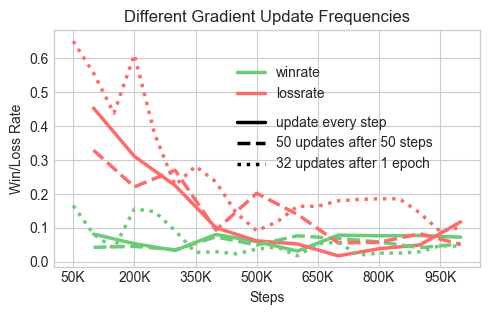

In [431]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3.25))

# gradient updates every step
winrate_every_step = won_games['TD3 (action targets clipped) - won_games'][~np.isnan(won_games['TD3 (action targets clipped) - won_games'])] / 1_000  # 1000 games played in evaluation
losrate_every_step = lost_games['TD3 (action targets clipped) - lost_games'][~np.isnan(lost_games['TD3 (action targets clipped) - lost_games'])] / 1_000
drawrate_every_step = 1.0 - winrate_every_step - losrate_every_step

# 50 gradient updates after 50 steps
winrate_50_updates = won_games['TD3 (50/50 train_freq) - won_games'][~np.isnan(won_games['TD3 (50/50 train_freq) - won_games'])] / 1_000  # 1000 games played in evaluation
losrate_50_updates = lost_games['TD3 (50/50 train_freq) - lost_games'][~np.isnan(lost_games['TD3 (50/50 train_freq) - lost_games'])] / 1_000
drawrate_50_updates = 1.0 - winrate_50_updates - losrate_50_updates

# 32 gradient updates after every epoch
winrate_32_updates = winrate['TD3 32 grad every epoch - winrate'][~np.isnan(winrate['TD3 32 grad every epoch - winrate'])][:20]  # cut at 1M steps
losrate_32_updates = lossrate['TD3 32 grad every epoch - lossrate'][~np.isnan(lossrate['TD3 32 grad every epoch - lossrate'])][:20]
drawrate_32_updates = drawrate['TD3 32 grad every epoch - drawrate'][~np.isnan(drawrate['TD3 32 grad every epoch - drawrate'])][:20]

# plot everyupdate step
x = np.arange(1, len(winrate_every_step)+1, 1) * 100_000  # evaluated at every 100k steps
plt.plot(x, winrate_every_step, c='#6BCB77', linewidth=2.5)
plt.plot(x, losrate_every_step, c='#FF6B6B', linewidth=2.5)
#plt.plot(x, drawrate_every_step, c='#4D96FF', linewidth=2.5)

# plot 50 updates after 50 steps
x = np.arange(1, len(winrate_50_updates)+1, 1) * 100_000  # evaluated at every 100k steps
plt.plot(x, winrate_50_updates, c='#6BCB77', linewidth=2.5, linestyle='--')
plt.plot(x, losrate_50_updates, c='#FF6B6B', linewidth=2.5, linestyle='--')
#plt.plot(x, drawrate_50_updates, c='#4D96FF', linewidth=2.5, linestyle='--')

# plot 32 updates after every epoch
x = np.arange(1, len(winrate_32_updates)+1, 1) * 50_000  # evaluated at every 50k steps
plt.plot(x, winrate_32_updates, c='#6BCB77', linewidth=2.5, linestyle=':')
plt.plot(x, losrate_32_updates, c='#FF6B6B', linewidth=2.5, linestyle=':')
#plt.plot(x, drawrate_32_updates, c='#4D96FF', linewidth=2.5, linestyle=':')

# format the x ticks
plt.xticks(np.arange(1, len(winrate_32_updates)+1, 3) * 50_000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# add two legends
linestyle_lines = []
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle='solid')[0])
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle='--')[0])
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle=':')[0])
linecolor_lines = []
linecolor_lines.append(axes.plot([],[], c="#6BCB77", linewidth=2.5, linestyle='solid')[0])
linecolor_lines.append(axes.plot([],[], c="#FF6B6B", linewidth=2.5, linestyle='solid')[0])
linecolor_lines.append(axes.plot([],[], c="#4D96FF", linewidth=2.5, linestyle='solid')[0])
legend1 = plt.legend([linecolor_lines[i] for i in [0,1]], ["winrate", "lossrate"], bbox_to_anchor=(0.4, 0.65), loc='lower left')
legend2 = plt.legend([linestyle_lines[i] for i in [0,1,2]], ["update every step", "50 updates after 50 steps", "32 updates after 1 epoch"], bbox_to_anchor=(0.4, 0.35), loc='lower left')
axes.add_artist(legend1)

plt.title('Different Gradient Update Frequencies')
plt.xlabel('Steps')
plt.ylabel('Win/Loss Rate')
plt.tight_layout()
plt.savefig('plots_report/td3_gradient_updates.pdf')
plt.show()

### Buffersize

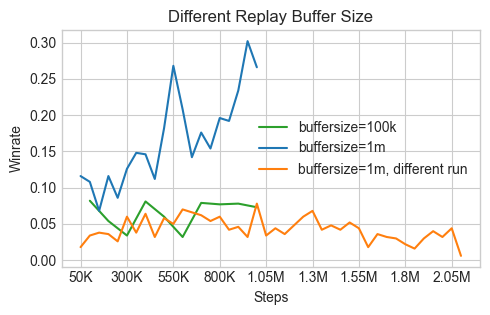

In [456]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3.25))

# buffersize 100k
wr_100k = won_games['TD3 (action targets clipped) - won_games'][~np.isnan(won_games['TD3 (action targets clipped) - won_games'])] / 1_000  # 1000 games per evaluation

# buffersize 1m
wr_1m = won_games['TD3 big buffer - won_games'][~np.isnan(won_games['TD3 big buffer - won_games'])] / 500  # 500 games per evaluation

# buffersize 1m - different seed
wr_1m_diff_seed = winrate['TD3 big buffer 2nd try - winrate'][~np.isnan(winrate['TD3 big buffer 2nd try - winrate'])][:42]

x = np.arange(1, len(wr_100k)+1) * 100_000  # every 100k steps evaluated
axes.plot(x, wr_100k, c='tab:green', label='buffersize=100k')

x = np.arange(1, len(wr_1m)+1) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_1m, c='tab:blue', label='buffersize=1m')

x = np.arange(1, len(wr_1m_diff_seed)+1) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_1m_diff_seed, c='tab:orange', label='buffersize=1m, different run')

# format the x ticks
plt.xticks(np.arange(1, len(wr_1m_diff_seed)+1, 5) * 50_000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.title('Different Replay Buffer Size')
plt.xlabel('Steps')
plt.ylabel('Winrate')
plt.tight_layout()
plt.legend()
plt.savefig('plots_report/td3_buffersize.pdf')
plt.show()

### Reward

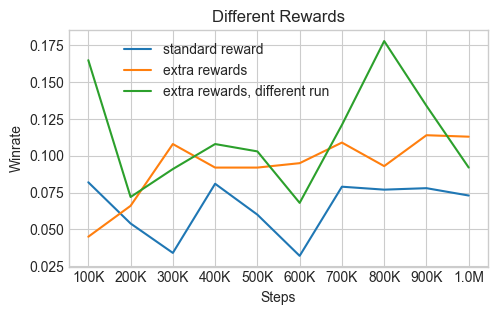

In [466]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3.25))

# standard reward
wr_std_rew = won_games['TD3 (action targets clipped) - won_games'][~np.isnan(won_games['TD3 (action targets clipped) - won_games'])] / 1_000  # 1000 games per evaluation

# extra rewards
wr_extra_rew = won_games['TD3 with 4 rewards - won_games'][~np.isnan(won_games['TD3 with 4 rewards - won_games'])] / 1_000  # 1000 games per evaluation

# extra reward different seed
wr_extra_rew_diff_seed = won_games['TD3, 4 rew, eval-train mode - won_games'][~np.isnan(won_games['TD3, 4 rew, eval-train mode - won_games'])] / 1_000  # 1000 games per evaluation

x = np.arange(1, len(wr_std_rew)+1) * 100_000  # every 100k steps evaluated
plt.plot(x, wr_std_rew, label='standard reward')
plt.plot(x, wr_extra_rew, label='extra rewards')
plt.plot(x, wr_extra_rew_diff_seed, label='extra rewards, different run')

# format the x ticks
plt.xticks(np.arange(1, len(wr_std_rew)+1, 1) * 100_000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.title('Different Rewards')
plt.xlabel('Steps')
plt.ylabel('Winrate')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.1, 1), loc='upper left')
plt.savefig('plots_report/td3_rewards.pdf')
plt.show()

### Learningrates - Appendix

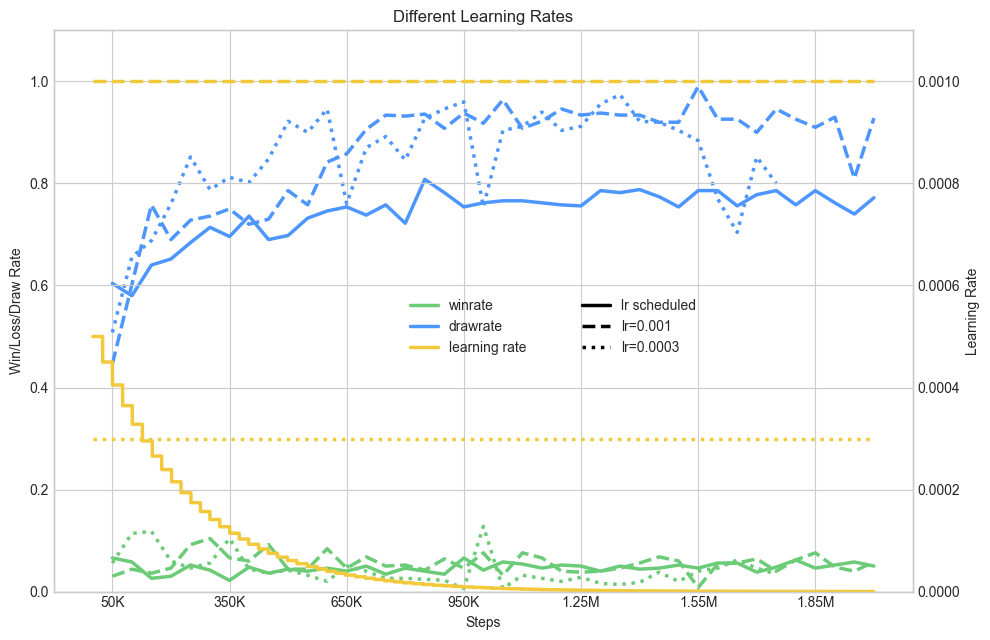

In [471]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6.5))
ax2 = axes.twinx()

# lr = 0.0003
wr_low_lr = won_games['TD3 - won_games'][~np.isnan(won_games['TD3 - won_games'])] / 500  # 500 games evaluated
lr_low_lr = lost_games['TD3 - lost_games'][~np.isnan(lost_games['TD3 - lost_games'])] / 500
dr_low_lr = 1.0 - wr_low_lr - lr_low_lr

# lr = 0.001
wr_high_lr = winrate['TD3 high lr - winrate'][~np.isnan(winrate['TD3 high lr - winrate'])]
lr_high_lr = lossrate['TD3 high lr - lossrate'][~np.isnan(lossrate['TD3 high lr - lossrate'])]
dr_high_lr = drawrate['TD3 high lr - drawrate'][~np.isnan(drawrate['TD3 high lr - drawrate'])]

# lr scheduled
wr_lr_scheduled = lr_sched_wr['TD3 big buffer lr scheduler - winrate'][~np.isnan(lr_sched_wr['TD3 big buffer lr scheduler - winrate'])]
lr_lr_scheduled = lr_sched_lr['TD3 big buffer lr scheduler - lossrate'][~np.isnan(lr_sched_lr['TD3 big buffer lr scheduler - lossrate'])]
dr_lr_scheduled = lr_sched_dr['TD3 big buffer lr scheduler - drawrate'][~np.isnan(lr_sched_dr['TD3 big buffer lr scheduler - drawrate'])]
lr_scheduled = lrs['TD3 big buffer lr scheduler - lr'][~np.isnan(lrs['TD3 big buffer lr scheduler - lr'])]

x = np.arange(1, len(wr_lr_scheduled)+1) * 50_000  # every 50k steps evaluated
x_lr = np.arange(1, len(lr_scheduled)+1) * 20  # every 20 steps tracked
axes.plot(x, wr_lr_scheduled, c='#6BCB77', linewidth=2.5)
#axes.plot(x, lr_lr_scheduled, c='#FF6B6B', linewidth=2.5)
axes.plot(x, dr_lr_scheduled, c='#4D96FF', linewidth=2.5)
ax2.plot(x_lr, lr_scheduled, c='#F1C93B', linewidth=2.5)

x = np.arange(1, len(wr_high_lr)+1) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_high_lr, c='#6BCB77', linewidth=2.5, linestyle='--')
#axes.plot(x, lr_high_lr, c='#FF6B6B', linewidth=2.5, linestyle='--')
axes.plot(x, dr_high_lr, c='#4D96FF', linewidth=2.5, linestyle='--')
ax2.hlines(0.001, 0, 2_000_000, colors='#F1C93B', linewidth=2.5, linestyle='--')

x = np.arange(1, len(wr_low_lr)+1) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_low_lr, c='#6BCB77', linewidth=2.5, linestyle=':')
#axes.plot(x, lr_low_lr, c='#FF6B6B', linewidth=2.5, linestyle=':')
axes.plot(x, dr_low_lr, c='#4D96FF', linewidth=2.5, linestyle=':')
ax2.hlines(0.0003, 0, 2_000_000, colors='#F1C93B', linewidth=2.5, linestyle=':')

# format the x ticks
plt.xticks(np.arange(1, len(wr_high_lr)+1, 6) * 50_000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# add two legends
linestyle_lines = []
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle='solid')[0])
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle='--')[0])
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle=':')[0])
linecolor_lines = []
linecolor_lines.append(axes.plot([],[], c="#6BCB77", linewidth=2.5, linestyle='solid')[0])
linecolor_lines.append(axes.plot([],[], c="#4D96FF", linewidth=2.5, linestyle='solid')[0])
linecolor_lines.append(ax2.plot([],[], c="#F1C93B", linewidth=2.5, linestyle='solid')[0])
legend1 = plt.legend([linecolor_lines[i] for i in [0,1,2]], ["winrate", "drawrate", "learning rate"], bbox_to_anchor=(0.4, 0.4), loc='lower left')
legend2 = plt.legend([linestyle_lines[i] for i in [0,1,2]], ["lr scheduled", "lr=0.001", "lr=0.0003"], bbox_to_anchor=(0.6, 0.4), loc='lower left')
ax2.add_artist(legend1)

axes.set_ylim(0, 1.1)
ax2.set_ylim(0, 0.0011)
plt.title('Different Learning Rates')
axes.set_xlabel('Steps')
axes.set_ylabel('Win/Loss/Draw Rate')
ax2.set_ylabel('Learning Rate')
plt.tight_layout()
plt.savefig('plots_report/td3_learning_rates_appendix.pdf')
plt.show()

### Learning Rates

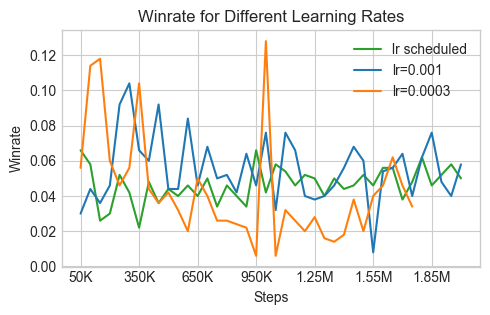

In [428]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3.25))

# winrates
wr_low_lr = won_games['TD3 - won_games'][~np.isnan(won_games['TD3 - won_games'])] / 500  # 500 games evaluated
wr_high_lr = winrate['TD3 high lr - winrate'][~np.isnan(winrate['TD3 high lr - winrate'])]
wr_lr_scheduled = lr_sched_wr['TD3 big buffer lr scheduler - winrate'][~np.isnan(lr_sched_wr['TD3 big buffer lr scheduler - winrate'])]


x = np.arange(1, len(wr_lr_scheduled)+1) * 50_000  # every 50k steps evaluated
x_lr = np.arange(1, len(lr_scheduled)+1) * 20  # every 20 steps tracked
axes.plot(x, wr_lr_scheduled, c='tab:green', label='lr scheduled')

x = np.arange(1, len(wr_high_lr)+1) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_high_lr, c='tab:blue', label='lr=0.001')

x = np.arange(1, len(wr_low_lr)+1) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_low_lr, c='tab:orange', label='lr=0.0003')

# format the x ticks
plt.xticks(np.arange(1, len(wr_high_lr)+1, 6) * 50_000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

plt.title('Winrate for Different Learning Rates')
axes.set_xlabel('Steps')
axes.set_ylabel('Winrate')
ax2.set_ylabel('Learning Rate')
plt.tight_layout()
plt.legend()
plt.savefig('plots_report/td3_learning_rates.pdf')
plt.show()

### Curriculum Learning

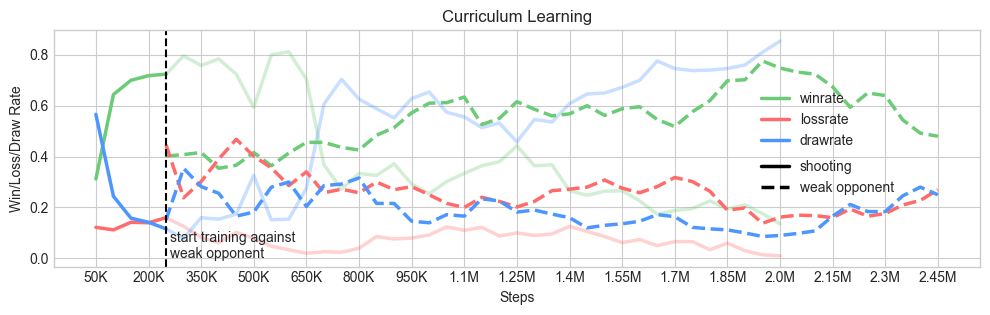

In [481]:
fig, axes = plt.subplots(1, 1, figsize=(10, 3.25))

# shooting training
wr_shooting_pre = winrate['TD3 high lr, shooting - winrate'][~np.isnan(winrate['TD3 high lr, shooting - winrate'])][:5]
lr_shooting_pre = lossrate['TD3 high lr, shooting - lossrate'][~np.isnan(lossrate['TD3 high lr, shooting - lossrate'])][:5]
dr_shooting_pre = drawrate['TD3 high lr, shooting - drawrate'][~np.isnan(drawrate['TD3 high lr, shooting - drawrate'])][:5]

wr_shooting_cont = winrate['TD3 high lr, shooting - winrate'][~np.isnan(winrate['TD3 high lr, shooting - winrate'])][4:]
lr_shooting_cont = lossrate['TD3 high lr, shooting - lossrate'][~np.isnan(lossrate['TD3 high lr, shooting - lossrate'])][4:]
dr_shooting_cont = drawrate['TD3 high lr, shooting - drawrate'][~np.isnan(drawrate['TD3 high lr, shooting - drawrate'])][4:]

# weak opponent after shooting training
wr_weak = winrate['TD3 high lr, shooting pre - winrate'][~np.isnan(winrate['TD3 high lr, shooting pre - winrate'])]
lr_weak = lossrate['TD3 high lr, shooting pre - lossrate'][~np.isnan(lossrate['TD3 high lr, shooting pre - lossrate'])]
dr_weak = drawrate['TD3 high lr, shooting pre - drawrate'][~np.isnan(drawrate['TD3 high lr, shooting pre - drawrate'])]

# plot shooting training
x = np.arange(1, len(wr_shooting_pre)+1) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_shooting_pre, c='#6BCB77', linewidth=2.5)
axes.plot(x, lr_shooting_pre, c="#FF6B6B", linewidth=2.5)
axes.plot(x, dr_shooting_pre, c="#4D96FF", linewidth=2.5)

x = np.arange(5, len(wr_shooting_cont)+5) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_shooting_cont, c='#6BCB77', linewidth=2.5, alpha=0.3)
axes.plot(x, lr_shooting_cont, c="#FF6B6B", linewidth=2.5, alpha=0.3)
axes.plot(x, dr_shooting_cont, c="#4D96FF", linewidth=2.5, alpha=0.3)

# plot weak opponent after shooting training
x = np.arange(5, len(wr_weak)+5) * 50_000  # every 50k steps evaluated
axes.plot(x, wr_weak, c='#6BCB77', linewidth=2.5, linestyle='--')
axes.plot(x, lr_weak, c="#FF6B6B", linewidth=2.5, linestyle='--')
axes.plot(x, dr_weak, c="#4D96FF", linewidth=2.5, linestyle='--')

plt.axvline(x=250_000, color='black', linestyle='--', linewidth=1.5)

plt.text(260_000, 0, 'start training against\nweak opponent', fontsize=10)

# format the x ticks
plt.xticks(np.arange(1, len(wr_shooting_pre)+len(wr_weak), 3) * 50_000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# add two legends
linestyle_lines = []
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle='solid')[0])
linestyle_lines.append(axes.plot([],[], c="black", linewidth=2.5, linestyle='--')[0])
linecolor_lines = []
linecolor_lines.append(axes.plot([],[], c="#6BCB77", linewidth=2.5, linestyle='solid')[0])
linecolor_lines.append(axes.plot([],[], c="#FF6B6B", linewidth=2.5, linestyle='solid')[0])
linecolor_lines.append(axes.plot([],[], c="#4D96FF", linewidth=2.5, linestyle='solid')[0])
legend1 = plt.legend([linecolor_lines[i] for i in [0,1,2]], ["winrate", "lossrate", "drawrate"], bbox_to_anchor=(0.75, 0.45), loc='lower left')
legend2 = plt.legend([linestyle_lines[i] for i in [0,1]], ["shooting", "weak opponent"], bbox_to_anchor=(0.75, 0.25), loc='lower left')
axes.add_artist(legend1)

plt.title('Curriculum Learning')
plt.xlabel('Steps')
plt.ylabel('Win/Loss/Draw Rate')
plt.tight_layout()
plt.savefig('plots_report/td3_curriculum_learning.pdf')
plt.show()

# GYM Environments

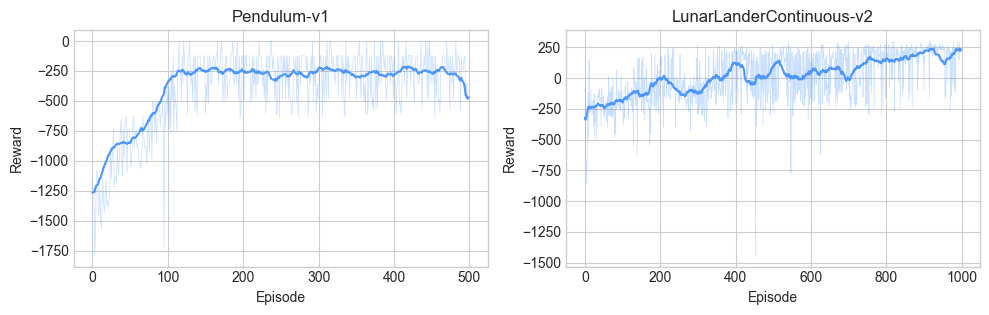

In [343]:
reward_pendulum = np.load(path + 'reward_history_pendulum.npy')
reward_lunarlander = np.load(path + 'reward_history_lunarlander.npy')

reward_pendulum_smooth = []
for i in range(0, len(reward_pendulum), 1):
    reward_pendulum_smooth.append(np.mean(reward_pendulum[i:i+30]))

reward_lunarlander_smooth = []
for i in range(0, len(reward_lunarlander), 1):
    reward_lunarlander_smooth.append(np.mean(reward_lunarlander[i:i+30]))


fig, axes = plt.subplots(1, 2, figsize=(10, 3.25))

axes[0].plot(reward_pendulum, linewidth=0.5, alpha=0.3, color='#4D96FF')
axes[0].plot(reward_pendulum_smooth, linewidth=1.5, color='#4D96FF')
axes[0].set_title('Pendulum-v1')
axes[0].set_xlabel('Episode')
axes[0].set_ylabel('Reward')

axes[1].plot(reward_lunarlander, linewidth=0.5, alpha=0.3, color='#4D96FF')
axes[1].plot(reward_lunarlander_smooth, linewidth=1.5, color='#4D96FF')
axes[1].set_title('LunarLanderContinuous-v2')
axes[1].set_xlabel('Episode')
axes[1].set_ylabel('Reward')
plt.tight_layout()
plt.savefig('plots_report/td3_simple_envs.pdf')
plt.show()